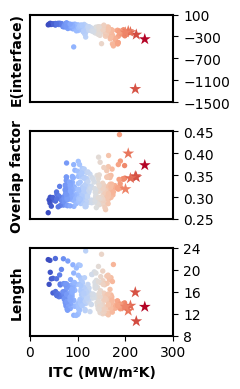

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

TCfile_path = './1-Cal_300_all.csv'
TCdata = pd.read_csv(TCfile_path, index_col='SAMindex')

TC200file_path = './1-Cal_300_all-200.csv'
TC200data = pd.read_csv(TC200file_path, index_col='SAMindex')

x = TCdata['TC_mean']
y1 = TCdata['c_interface_mean']
y2 = TCdata['Water_all_overlap_factor']
y3 = TCdata['SAM_length_mean']

x_200 = TC200data['TC_mean']
y1_200 = TC200data['c_interface_mean']
y2_200 = TC200data['Water_all_overlap_factor']
y3_200 = TC200data['SAM_length_mean']

norm = Normalize(vmin=min(x.min(), x_200.min()), vmax=max(x.max(), x_200.max()))
fig, axs = plt.subplots(3, 1, figsize=(2.5, 4))
cmap = plt.get_cmap('coolwarm')
xticks = np.arange(0, 301, 100)

sc1 = axs[0].scatter(x, y1, c=x, cmap=cmap, norm=norm, label='TCdata', s=15, edgecolor='none')
sc2 = axs[0].scatter(x_200, y1_200, c=x_200, cmap=cmap, norm=norm, marker='*', label='TC200data', s=80, edgecolor='none')
axs[0].set_ylabel('E(interface)', fontsize=10, weight='bold')
axs[0].set_xlim(0, 300) 
axs[0].set_xticks([])    
axs[0].set_ylim(-1500, 100) 
axs[0].set_yticks(np.arange(-1500, 100.1, 400)) 
axs[0].yaxis.tick_right() 

sc3 = axs[1].scatter(x, y2, c=x, cmap=cmap, norm=norm, label='TCdata', s=15, edgecolor='none')
sc4 = axs[1].scatter(x_200, y2_200, c=x_200, cmap=cmap, norm=norm, marker='*', label='TC200data', s=80, edgecolor='none')
axs[1].set_ylabel('Overlap factor', fontsize=10, weight='bold')
axs[1].set_xlim(0, 300)  
axs[1].set_xticks([])   
axs[1].set_ylim(0.25, 0.45) 
axs[1].set_yticks(np.arange(0.25, 0.46, 0.05)) 
axs[1].yaxis.tick_right()

sc5 = axs[2].scatter(x, y3, c=x, cmap=cmap, norm=norm, label='TCdata', s=15, edgecolor='none')
sc6 = axs[2].scatter(x_200, y3_200, c=x_200, cmap=cmap, norm=norm, marker='*', label='TC200data', s=80, edgecolor='none')
axs[2].set_ylabel('Length', fontsize=10, weight='bold')
axs[2].set_xlabel('ITC (MW/m²K)', fontsize=10, weight='bold')
axs[2].set_xlim(0, 300) 
axs[2].set_xticks(xticks) 
axs[2].set_ylim(8, 24)   
axs[2].set_yticks(np.arange(8, 25, 4))  
axs[2].yaxis.tick_right()  

for spine in axs[0].spines.values():
    spine.set_linewidth(1.5)

for spine in axs[1].spines.values():
    spine.set_linewidth(1.5)
    
for spine in axs[2].spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.savefig('plot2d.jpg', dpi=1000)
plt.show()
